Importing libraries

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import heapq
import re

from nltk.tokenize import RegexpTokenizer
from keras.models import Sequential, load_model
from keras.layers import LSTM
from keras.layers.core import Dense, Activation

from tqdm import tnrange, tqdm_notebook
import tensorflow as tf
import tensorflow_addons as tfa

from time import sleep
import warnings
warnings.filterwarnings('ignore')

Reading data

In [3]:
file_path = 'Predict_next_word.txt'

In [4]:
with open(file_path,'r',encoding='utf-8') as f:
    file_data = f.readlines()

In [5]:
file_str = " ".join(file_data)

In [8]:
file_str = re.sub("[^A-Za-z" "]+"," ",file_str).lower()

In [9]:
tokenizer = RegexpTokenizer(r'[\w]+')
words = tokenizer.tokenize(file_str)

In [10]:
words

['project',
 'gutenberg',
 's',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'by',
 'arthur',
 'conan',
 'doyle',
 'this',
 'ebook',
 'is',
 'for',
 'the',
 'use',
 'of',
 'anyone',
 'anywhere',
 'at',
 'no',
 'cost',
 'and',
 'with',
 'almost',
 'no',
 'restrictions',
 'whatsoever',
 'you',
 'may',
 'copy',
 'it',
 'give',
 'it',
 'away',
 'or',
 're',
 'use',
 'it',
 'under',
 'the',
 'terms',
 'of',
 'the',
 'project',
 'gutenberg',
 'license',
 'included',
 'with',
 'this',
 'ebook',
 'or',
 'online',
 'at',
 'www',
 'gutenberg',
 'net',
 'title',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'author',
 'arthur',
 'conan',
 'doyle',
 'release',
 'date',
 'november',
 'ebook',
 'last',
 'updated',
 'may',
 'language',
 'english',
 'character',
 'set',
 'encoding',
 'utf',
 'start',
 'of',
 'this',
 'project',
 'gutenberg',
 'ebook',
 'the',
 'adventures',
 'of',
 'sherlock',
 'holmes',
 'produced',
 'by',
 'an',
 'anonymous',
 'project',
 'gutenberg',
 'volunteer'

In [11]:
unique_words = np.unique(words)
unique_word_index = dict((word, idx) for idx, word in enumerate(unique_words))

In [12]:
WORD_LENGTH = 5
prev_words = []
next_words = []
for i in range(len(words) - WORD_LENGTH):
    prev_words.append(words[i:i + WORD_LENGTH])
    next_words.append(words[i + WORD_LENGTH])
print(prev_words[0])
print(next_words[0])

['project', 'gutenberg', 's', 'the', 'adventures']
of


In [13]:
X = np.zeros((len(prev_words), WORD_LENGTH, len(unique_words)), dtype=bool)
Y = np.zeros((len(next_words), len(unique_words)), dtype=bool)

In [14]:
for i, each_words in enumerate(prev_words):
    for j, each_word in enumerate(each_words):
        X[i, j, unique_word_index[each_word]] = 1
    Y[i, unique_word_index[next_words[i]]] = 1

Training the model

In [15]:
model = Sequential()
model.add(LSTM(128, input_shape=(WORD_LENGTH, len(unique_words))))
model.add(Dense(len(unique_words)))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [17]:
tqdm_callback = tfa.callbacks.TQDMProgressBar()

history = model.fit(X, Y, validation_split=0.05, batch_size=128, epochs=20, callbacks=[tqdm_callback], shuffle=True).history

Epoch 1/20
Epoch 1/20


810/810 [==============================] - 262s 270ms/step - loss: 6.7526 - accuracy: 0.0522 - val_loss: 7.4076 - val_accuracy: 0.0550

Epoch 2/20
Epoch 2/20


810/810 [==============================] - 206s 254ms/step - loss: 6.2480 - accuracy: 0.0587 - val_loss: 7.0161 - val_accuracy: 0.0769

Epoch 3/20
Epoch 3/20


810/810 [==============================] - 214s 264ms/step - loss: 5.9788 - accuracy: 0.0905 - val_loss: 7.0200 - val_accuracy: 0.0864

Epoch 4/20
Epoch 4/20


810/810 [==============================] - 212s 262ms/step - loss: 5.7874 - accuracy: 0.1128 - val_loss: 6.8552 - val_accuracy: 0.0985

Epoch 5/20
Epoch 5/20


810/810 [==============================] - 213s 263ms/step - loss: 5.6309 - accuracy: 0.1265 - val_loss: 6.7874 - val_accuracy: 0.1003

Epoch 6/20
Epoch 6/20


810/810 [==============================] - 209s 258ms/step - loss: 5.5302 - accuracy: 0.1362 - val_loss: 6.7871 - val_accuracy: 0.1016

Epoch 7/20
Epoch 7/20


810/810 [==============================] - 209s 258ms/step - loss: 5.4231 - accuracy: 0.1482 - val_loss: 6.9069 - val_accuracy: 0.0948

Epoch 8/20
Epoch 8/20


810/810 [==============================] - 206s 254ms/step - loss: 5.3407 - accuracy: 0.1577 - val_loss: 7.0188 - val_accuracy: 0.0981

Epoch 9/20
Epoch 9/20


810/810 [==============================] - 210s 259ms/step - loss: 5.2321 - accuracy: 0.1682 - val_loss: 6.8686 - val_accuracy: 0.0928

Epoch 10/20
Epoch 10/20


810/810 [==============================] - 210s 259ms/step - loss: 5.1558 - accuracy: 0.1803 - val_loss: 7.0672 - val_accuracy: 0.0950

Epoch 11/20
Epoch 11/20


810/810 [==============================] - 180s 222ms/step - loss: 5.0812 - accuracy: 0.1913 - val_loss: 7.1040 - val_accuracy: 0.0818

Epoch 12/20
Epoch 12/20


810/810 [==============================] - 161s 199ms/step - loss: 5.0105 - accuracy: 0.2049 - val_loss: 7.2099 - val_accuracy: 0.0818

Epoch 13/20
Epoch 13/20


810/810 [==============================] - 163s 201ms/step - loss: 4.9873 - accuracy: 0.2191 - val_loss: 7.5088 - val_accuracy: 0.0772

Epoch 14/20
Epoch 14/20


810/810 [==============================] - 160s 197ms/step - loss: 5.0562 - accuracy: 0.2289 - val_loss: 7.7169 - val_accuracy: 0.0851

Epoch 15/20
Epoch 15/20


810/810 [==============================] - 164s 202ms/step - loss: 5.1023 - accuracy: 0.2430 - val_loss: 7.8698 - val_accuracy: 0.0807

Epoch 16/20
Epoch 16/20


810/810 [==============================] - 163s 201ms/step - loss: 5.0987 - accuracy: 0.2550 - val_loss: 8.1379 - val_accuracy: 0.0780

Epoch 17/20
Epoch 17/20


810/810 [==============================] - 173s 213ms/step - loss: 5.1348 - accuracy: 0.2629 - val_loss: 8.1277 - val_accuracy: 0.0822

Epoch 18/20
Epoch 18/20


810/810 [==============================] - 153s 189ms/step - loss: 5.1097 - accuracy: 0.2759 - val_loss: 8.2408 - val_accuracy: 0.0826

Epoch 19/20
Epoch 19/20


810/810 [==============================] - 156s 192ms/step - loss: 5.1067 - accuracy: 0.2874 - val_loss: 8.3338 - val_accuracy: 0.0813

Epoch 20/20
Epoch 20/20


810/810 [==============================] - 150s 185ms/step - loss: 5.0502 - accuracy: 0.3011 - val_loss: 8.2822 - val_accuracy: 0.0791




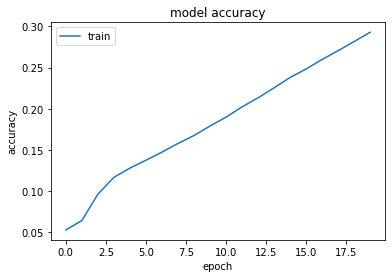

In [22]:
plt.plot(history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

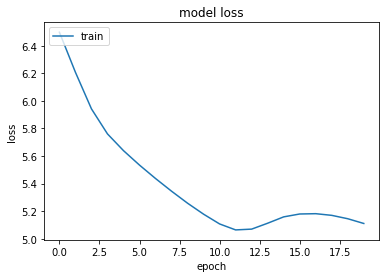

In [23]:
plt.plot(history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

In [24]:
model.save('keras_next_word_model.h5')
pickle.dump(history, open("history.p", "wb"))

model = load_model('keras_next_word_model.h5')
history = pickle.load(open("history.p", "rb"))

In [25]:
def prepare_input(text):
    x = np.zeros((1, WORD_LENGTH, len(unique_words)))
    for t, word in enumerate(text.split()):
        print(word)
        x[0, t, unique_word_index[word]] = 1
    return x

In [26]:
def sample(preds, top_n=3):
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds)
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    return heapq.nlargest(top_n, range(len(preds)), preds.take)

In [27]:
def predict_completions(text, n=3):
    if text == "":
        return("0")
    x = prepare_input(text)
    preds = model.predict(x, verbose=0)[0]
    next_indices = sample(preds, n)
    return [unique_words[idx] for idx in next_indices]

Prediction

In [28]:
quotes = [
    "It is not a lack of love, but a lack of friendship that makes unhappy marriages.",
    "That which does not kill us makes us stronger.",
    "I'm not upset that you lied to me, I'm upset that from now on I can't believe you.",
    "And those who were seen dancing were thought to be insane by those who could not hear the music.",
    "It is hard enough to remember my opinions, without also remembering my reasons for them!"
]

In [29]:
for q in quotes:
    print("****************************************************************************************************************")
    print(f'Correct sentence : {q}')
    seq = " ".join(tokenizer.tokenize(q.lower())[0:5])
    print(f'Sequence         : {seq}')
    print(f'Next possible words : {predict_completions(seq,5)}')

****************************************************************************************************************
Correct sentence : It is not a lack of love, but a lack of friendship that makes unhappy marriages.
Sequence         : it is not a lack
it
is
not
a
lack
Next possible words : ['s', 'man', 'i', 'in', 'of']
****************************************************************************************************************
Correct sentence : That which does not kill us makes us stronger.
Sequence         : that which does not kill
that
which
does
not
kill
Next possible words : ['to', 'the', 'and', 'with', 'in']
****************************************************************************************************************
Correct sentence : I'm not upset that you lied to me, I'm upset that from now on I can't believe you.
Sequence         : i m not upset that
i
m
not
upset
that
Next possible words : ['is', 'the', 'i', 'it', 'he']
****************************************************